In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Validation Accuracy: 0.864406779661017
Test Accuracy: 0.8597285067873304
################################
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       376
           1       0.58      0.21      0.31        66

    accuracy                           0.86       442
   macro avg       0.73      0.59      0.62       442
weighted avg       0.83      0.86      0.83       442



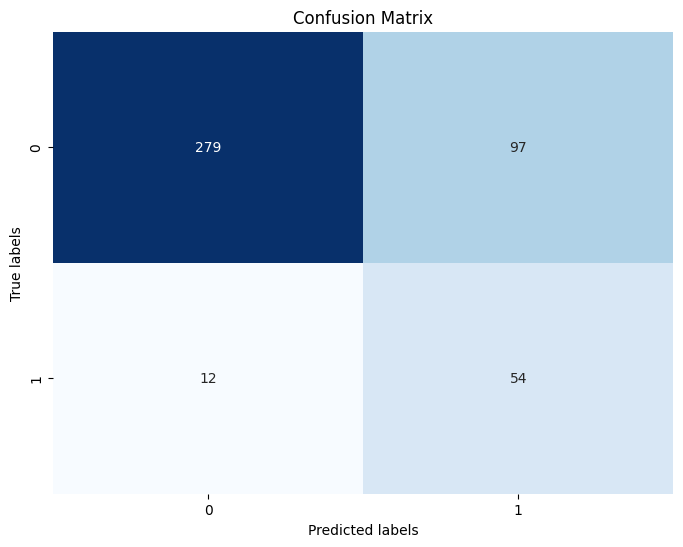

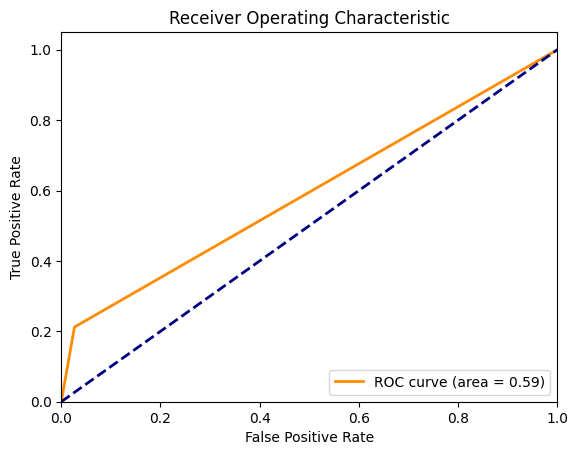

ROC AUC: 0.5927627337201806


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

import seaborn as sns

# Train 데이터 불러오기
train_data = pd.read_csv('/content/drive/MyDrive/데브코스/PROJECT/03/train_ver_2.csv')

# Train 데이터를 Train과 Validation 세트로 나누기
X_train, X_val, y_train, y_val = train_test_split(train_data.drop(columns=['Response']),
                                                  train_data['Response'],
                                                  test_size=0.2,
                                                  stratify=train_data['Response'],
                                                  random_state=31)

# 범주형 변수와 수치형 변수를 나누기
categorical_cols = ['Education', 'Marital_Status']
numeric_cols = [col for col in X_train.columns if col not in categorical_cols]

# 전처리를 위한 파이프라인 정의
preprocessor = ColumnTransformer([
    ('encoder', OneHotEncoder(), categorical_cols),
    ('scaler', StandardScaler(), numeric_cols)
])

# SVM 모델 초기화
svm_model = SVC(kernel='linear')

# 전처리를 포함한 파이프라인 정의
svm_pipeline = Pipeline([
    ('preprocessor', preprocessor),  # 전처리 파이프라인
    ('svm', svm_model)  # SVM 모델
])

# 모델 훈련하기
svm_pipeline.fit(X_train, y_train)

# Validation 세트로 모델 평가하기
val_pred = svm_pipeline.predict(X_val)
accuracy = accuracy_score(y_val, val_pred)
print(f"Validation Accuracy: {accuracy}")

# Test 데이터 불러오기
test_data = pd.read_csv('/content/drive/MyDrive/데브코스/PROJECT/03/test_ver_2.csv')

# Test 데이터 전처리하기
X_test = test_data.drop(columns=['Response'])  # Feature 변수 추출

# Test 데이터 예측하기
test_pred = svm_pipeline.predict(X_test)

# Test 데이터의 실제 타겟 변수
y_test = test_data['Response']

# Test 데이터에서 정확도 평가하기
test_accuracy = accuracy_score(y_test, test_pred)
print(f"Test Accuracy: {test_accuracy}")

# classification_report를 사용하여 분류 모델의 성능 평가하기
report = classification_report(y_test, test_pred)
print("################################")
print(report)

# Confusion Matrix 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


# ROC curve 그리기
fpr, tpr, thresholds = roc_curve(y_test, test_pred)
roc_auc = roc_auc_score(y_test, test_pred)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# ROC curve의 Area Under the Curve 계산
roc_auc = roc_auc_score(y_test, test_pred)
print(f"ROC AUC: {roc_auc}")

Validation Accuracy: 0.7570621468926554
Test Accuracy: 0.753393665158371
################################
              precision    recall  f1-score   support

           0       0.96      0.74      0.84       376
           1       0.36      0.82      0.50        66

    accuracy                           0.75       442
   macro avg       0.66      0.78      0.67       442
weighted avg       0.87      0.75      0.79       442

Confusion Matrix:
[[279  97]
 [ 12  54]]


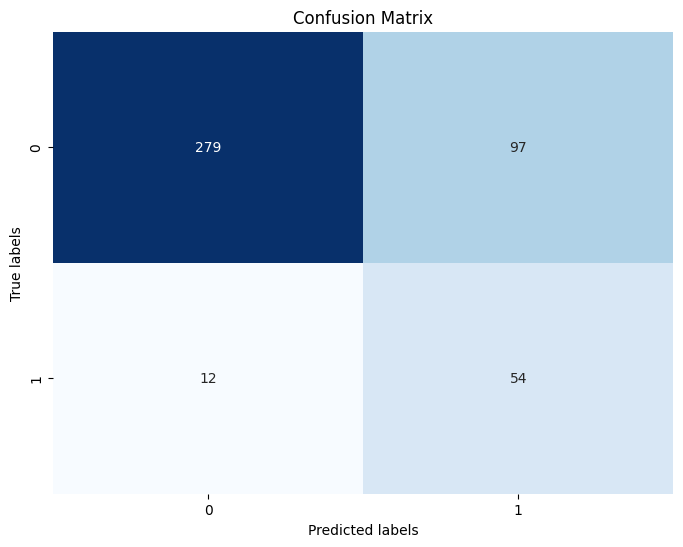

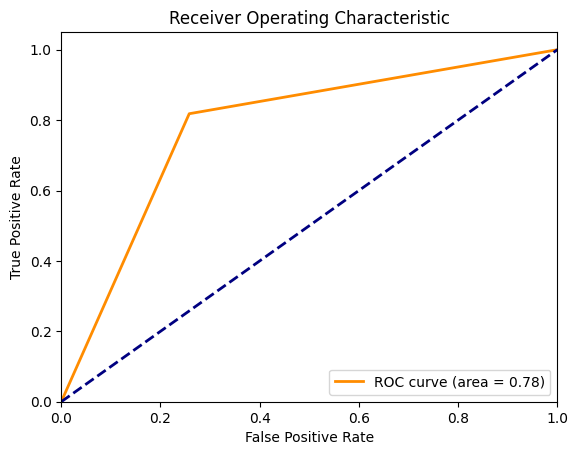

ROC AUC: 0.7801015473887816


In [18]:
# 불균형 클래스 처리, 클래스 가중치 조정

import numpy as np
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# 클래스 가중치 계산
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

# SVM 모델 초기화 및 클래스 가중치 설정
svm_model = SVC(kernel='linear', class_weight=dict(enumerate(class_weights)))

# 전처리 파이프라인 및 모델 파이프라인 정의
svm_pipeline = Pipeline([
    ('preprocessor', preprocessor),  # 전처리 파이프라인
    ('svm', svm_model)  # SVM 모델
])

# 모델 훈련하기
svm_pipeline.fit(X_train, y_train)

# Validation 세트로 모델 평가하기
val_pred = svm_pipeline.predict(X_val)
accuracy = accuracy_score(y_val, val_pred)
print(f"Validation Accuracy: {accuracy}")

# Test 데이터에서 예측하기
test_pred = svm_pipeline.predict(X_test)

# Test 데이터에서 정확도 평가하기
test_accuracy = accuracy_score(y_test, test_pred)
print(f"Test Accuracy: {test_accuracy}")

# classification_report를 사용하여 분류 모델의 성능 평가하기
report = classification_report(y_test, test_pred)
# 결과 출력
print("################################")
print(report)


# Confusion Matrix 계산
cm = confusion_matrix(y_test, test_pred)
print("Confusion Matrix:")
print(cm)

# Confusion Matrix 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# ROC curve 그리기
fpr, tpr, thresholds = roc_curve(y_test, test_pred)
roc_auc = roc_auc_score(y_test, test_pred)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# ROC curve의 Area Under the Curve 계산
roc_auc = roc_auc_score(y_test, test_pred)
print(f"ROC AUC: {roc_auc}")


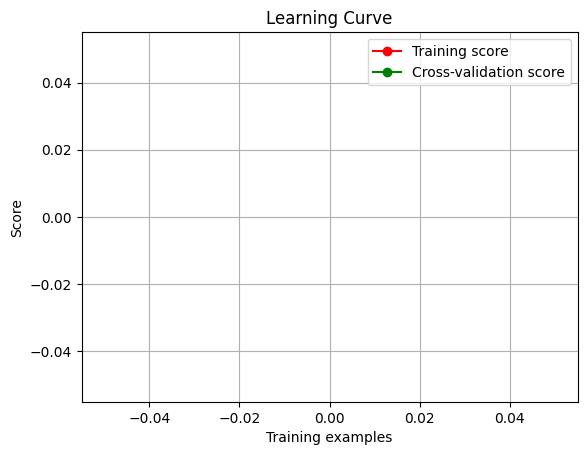

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# 예시: SVM 모델을 사용하여 학습 곡선 그리기
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# SVM 모델 초기화
svm_model = SVC(kernel='linear')

# 전처리 및 모델 파이프라인 정의
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # 특성 스케일링
    ('svm', svm_model)  # SVM 모델
])

# 학습 곡선 그리기
plot_learning_curve(svm_pipeline, "Learning Curve", X_train, y_train, cv=5, n_jobs=-1)
plt.show()



Best parameters: {'svm__C': 1, 'svm__gamma': 'scale', 'svm__kernel': 'linear'}
Validation Accuracy: 0.864406779661017
Test Accuracy: 0.8597285067873304
################################
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       376
           1       0.58      0.21      0.31        66

    accuracy                           0.86       442
   macro avg       0.73      0.59      0.62       442
weighted avg       0.83      0.86      0.83       442



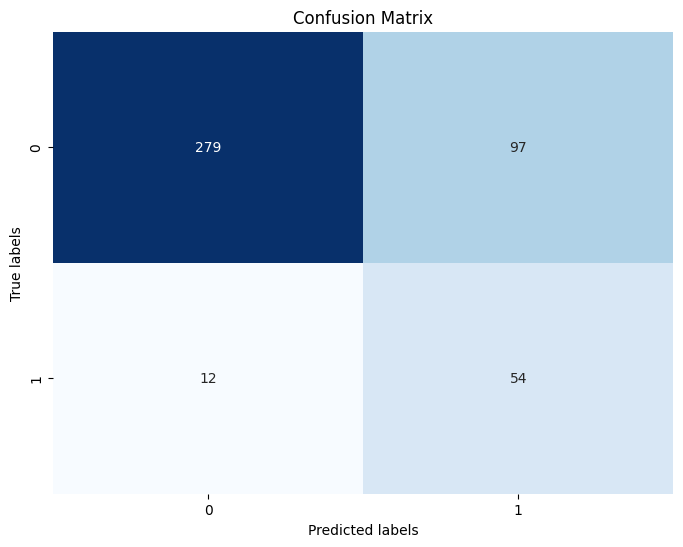

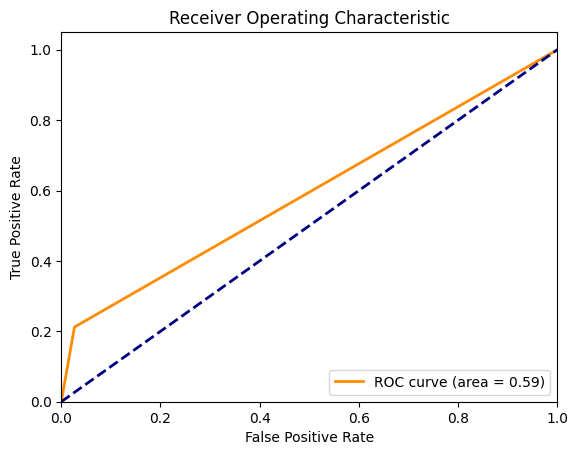

In [20]:
# 모델튜닝,하이퍼파라미터 튜닝, GridSearchCV

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# SVM 모델 초기화
svm_model = SVC()

# 전처리 파이프라인과 SVM 모델을 연결하여 파이프라인 구성
svm_pipeline = Pipeline([
    ('preprocessor', preprocessor),  # 전처리 파이프라인
    ('svm', svm_model)  # SVM 모델
])

# 탐색할 하이퍼파라미터 그리드 정의
param_grid = {
    'svm__kernel': ['linear', 'rbf'],  # 커널 종류
    'svm__C': [0.1, 1, 10],             # 규제 파라미터
    'svm__gamma': ['scale', 'auto']     # gamma 값
}

# GridSearchCV를 사용하여 최적의 하이퍼파라미터 조합 탐색
grid_search = GridSearchCV(svm_pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("Best parameters:", grid_search.best_params_)

# 최적의 모델 추출
best_model = grid_search.best_estimator_

# Validation 세트로 최적의 모델 평가하기
val_pred = best_model.predict(X_val)
accuracy = accuracy_score(y_val, val_pred)
print(f"Validation Accuracy: {accuracy}")

# Test 데이터에서 예측하기
test_pred = best_model.predict(X_test)

# Test 데이터에서 정확도 평가하기
test_accuracy = accuracy_score(y_test, test_pred)
print(f"Test Accuracy: {test_accuracy}")

# classification_report를 사용하여 분류 모델의 성능 평가하기
report = classification_report(y_test, test_pred)
# 결과 출력
print("################################")
print(report)

# Confusion Matrix 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# ROC curve 그리기
fpr, tpr, thresholds = roc_curve(y_test, test_pred)
roc_auc = roc_auc_score(y_test, test_pred)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Validation Accuracy: 0.864406779661017
Test Accuracy: 0.8597285067873304
################################
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       376
           1       0.58      0.21      0.31        66

    accuracy                           0.86       442
   macro avg       0.73      0.59      0.62       442
weighted avg       0.83      0.86      0.83       442



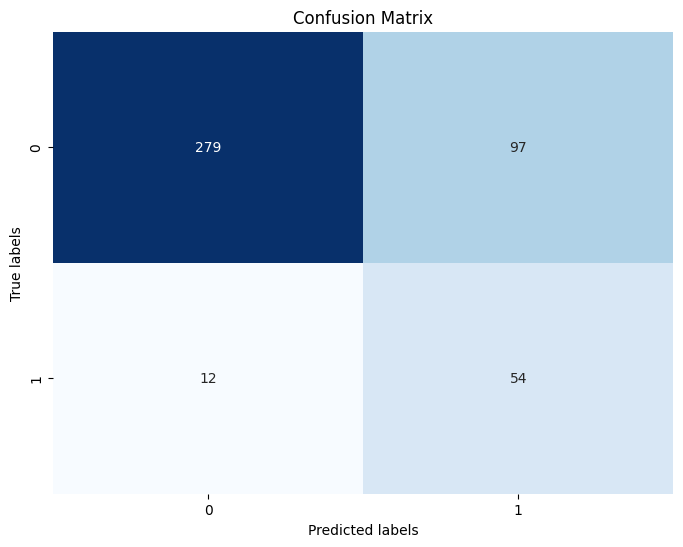

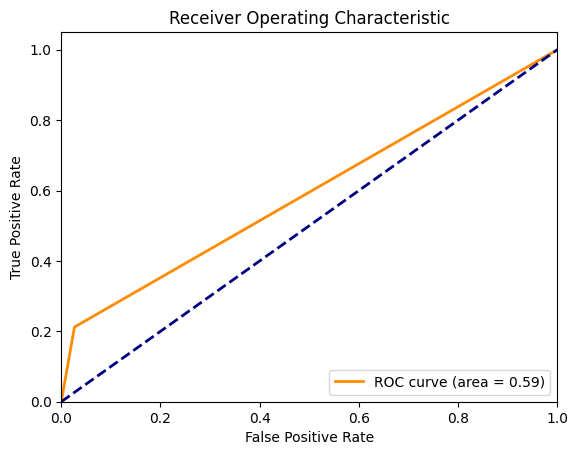

In [21]:
# 특성 스케일링, 표준화, 정규화

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Train 데이터 불러오기
train_data = pd.read_csv('/content/drive/MyDrive/데브코스/PROJECT/03/train_ver_2.csv')

# Train 데이터를 Train과 Validation 세트로 나누기
X_train, X_val, y_train, y_val = train_test_split(train_data.drop(columns=['Response']),
                                                  train_data['Response'],
                                                  test_size=0.2,
                                                  stratify=train_data['Response'],
                                                  random_state=31)

# 범주형 변수와 수치형 변수를 나누기
categorical_cols = ['Education', 'Marital_Status']
numeric_cols = [col for col in X_train.columns if col not in categorical_cols]

# 전처리를 위한 파이프라인 정의
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer([
    ('encoder', OneHotEncoder(), categorical_cols),
    ('scaler', numeric_transformer, numeric_cols)
])

# SVM 모델 초기화
svm_model = SVC(kernel='linear')

# 전처리를 포함한 파이프라인 정의
svm_pipeline = Pipeline([
    ('preprocessor', preprocessor),  # 전처리 파이프라인
    ('svm', svm_model)  # SVM 모델
])

# 모델 훈련하기
svm_pipeline.fit(X_train, y_train)

# Validation 세트로 모델 평가하기
val_pred = svm_pipeline.predict(X_val)
accuracy = accuracy_score(y_val, val_pred)
print(f"Validation Accuracy: {accuracy}")

# Test 데이터 불러오기
test_data = pd.read_csv('/content/drive/MyDrive/데브코스/PROJECT/03/test_ver_2.csv')

# Test 데이터에서 Feature 변수 추출하기
X_test = test_data.drop(columns=['Response'])

# Test 데이터에서 타겟 변수 추출하기
y_test = test_data['Response']

# Test 데이터에서 예측하기
test_pred = svm_pipeline.predict(X_test)

# Test 데이터에서 정확도 평가하기
test_accuracy = accuracy_score(y_test, test_pred)
print(f"Test Accuracy: {test_accuracy}")

# classification_report를 사용하여 분류 모델의 성능 평가하기
report = classification_report(y_test, test_pred)
# 결과 출력
print("################################")
print(report)

import seaborn as sns

# Confusion Matrix 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# ROC curve 그리기
fpr, tpr, thresholds = roc_curve(y_test, test_pred)
roc_auc = roc_auc_score(y_test, test_pred)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
